# IPL Data Visualization Using Matplotlib and Seaborn

### Drawing Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ipl_auction_df = pd.read_csv(r'D:\Learning-in-public\Practice_From_Books\Machine_Learning_With_Python\01_Exploratory_Data_Analysis\03_Exploration_of_Data_Using_Visualization\IPL IMB381IPL2013.csv')

### Bar Charts

In [4]:
soldprice_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
soldprice_by_age

,AGE,SOLD PRICE
0,1,720250.000000
1,2,484534.883721
2,3,520178.571429


<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

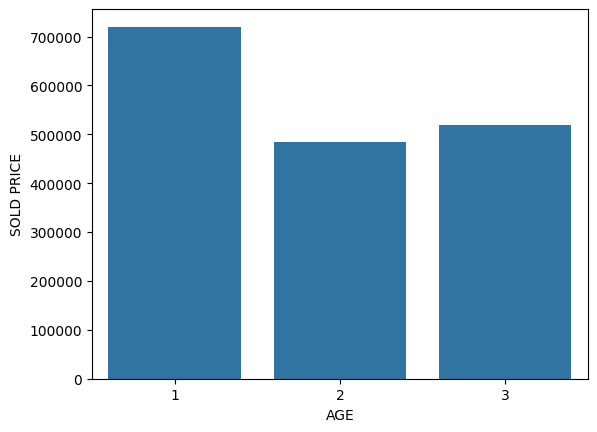

In [5]:
sns.barplot(x='AGE', y='SOLD PRICE', data=soldprice_by_age)

In [6]:
soldprice_by_age_role = (ipl_auction_df.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index())
soldprice_by_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,5.875000e+05
1,1,Batsman,1.110000e+06
2,1,Bowler,5.177143e+05
3,2,Allrounder,4.494000e+05
4,2,Batsman,6.547619e+05
5,2,Bowler,3.979310e+05
6,2,W. Keeper,4.677273e+05
7,3,Allrounder,7.666667e+05
8,3,Batsman,4.576923e+05
9,3,Bowler,4.143750e+05


In [7]:
soldprice_comparison = soldprice_by_age_role.merge(soldprice_by_age, on='AGE')
soldprice_comparison

,AGE,PLAYING ROLE,SOLD PRICE_x,SOLD PRICE_y
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721
5,2,Bowler,3.979310e+05,484534.883721
6,2,W. Keeper,4.677273e+05,484534.883721
7,3,Allrounder,7.666667e+05,520178.571429
8,3,Batsman,4.576923e+05,520178.571429
9,3,Bowler,4.143750e+05,520178.571429


In [8]:
soldprice_comparison.rename(columns={'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE', 'SOLD PRICE_y': 'SOLD_PRICE_AGE'}, inplace=True)
soldprice_comparison.head(5)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721


In [9]:
soldprice_comparison['Change'] = soldprice_comparison.apply(lambda rec: (rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE, axis=1)
soldprice_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,Change
0,1,Allrounder,5.875000e+05,720250.000000,-0.184311
1,1,Batsman,1.110000e+06,720250.000000,0.541132
2,1,Bowler,5.177143e+05,720250.000000,-0.281202
3,2,Allrounder,4.494000e+05,484534.883721,-0.072513
4,2,Batsman,6.547619e+05,484534.883721,0.351320
5,2,Bowler,3.979310e+05,484534.883721,-0.178736
6,2,W. Keeper,4.677273e+05,484534.883721,-0.034688
7,3,Allrounder,7.666667e+05,520178.571429,0.473853
8,3,Batsman,4.576923e+05,520178.571429,-0.120125
9,3,Bowler,4.143750e+05,520178.571429,-0.203399


<Axes: xlabel='AGE', ylabel='SOLD_PRICE_AGE_ROLE'>

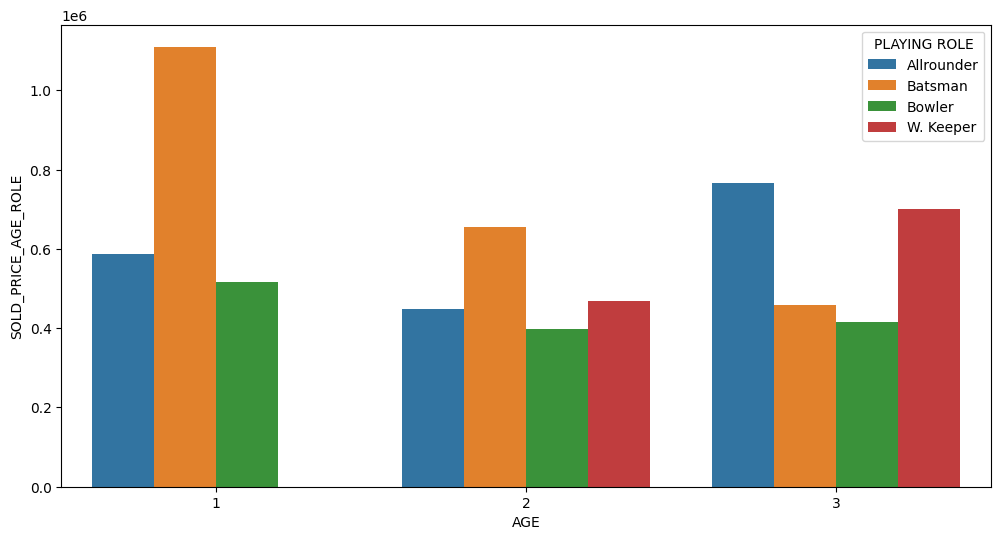

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='AGE', y='SOLD_PRICE_AGE_ROLE', hue='PLAYING ROLE', data=soldprice_comparison)

### Histograms

(array([27., 32., 21., 20., 14.,  7.,  0.,  1.,  4.,  4.]),
 array([  20000.,  198000.,  376000.,  554000.,  732000.,  910000.,
        1088000., 1266000., 1444000., 1622000., 1800000.]),
 <BarContainer object of 10 artists>)

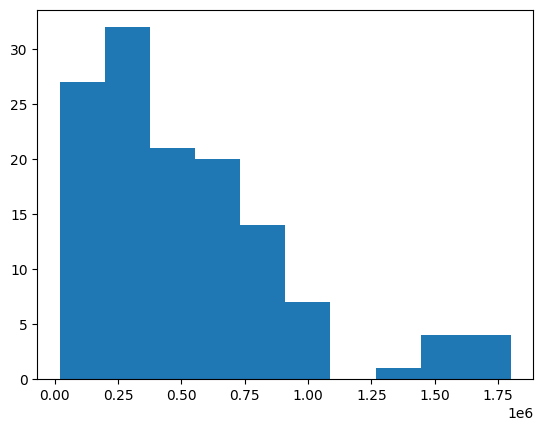

In [11]:
plt.hist(ipl_auction_df['SOLD PRICE'])

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <BarContainer object of 20 artists>)

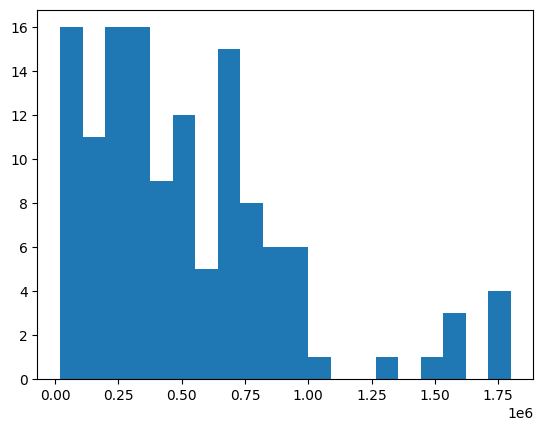

In [12]:
plt.hist(ipl_auction_df['SOLD PRICE'], bins=20)

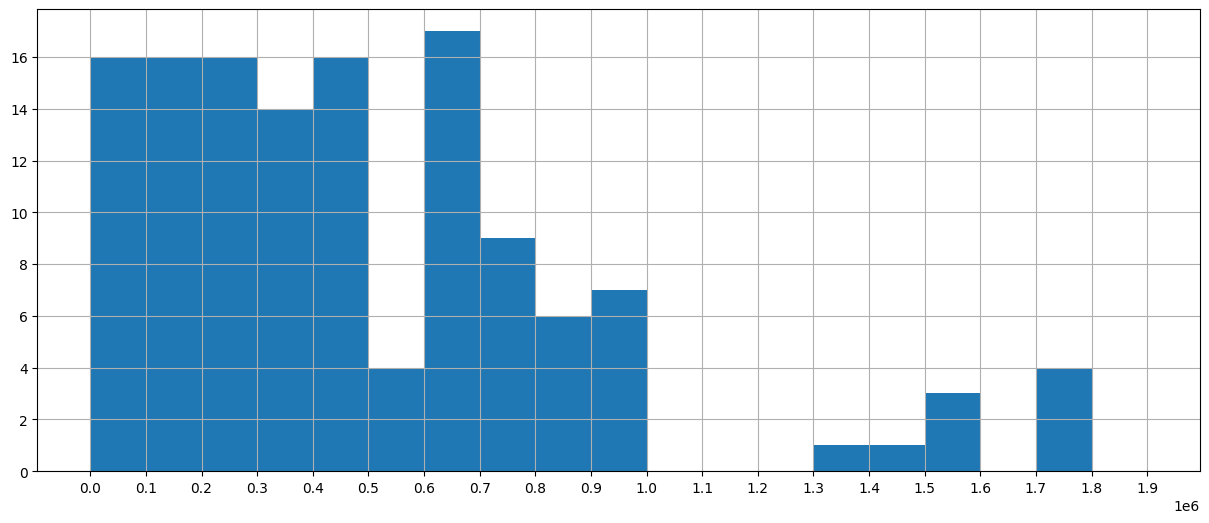

In [13]:
plt.figure(figsize=(15,6))
plt.hist(ipl_auction_df['SOLD PRICE'], bins=range(1, 2000000, 100000))
plt.xticks(range(1, 2000000, 100000))
plt.grid(True)

### Distribution or Density Plots

<Axes: xlabel='SOLD PRICE', ylabel='Density'>

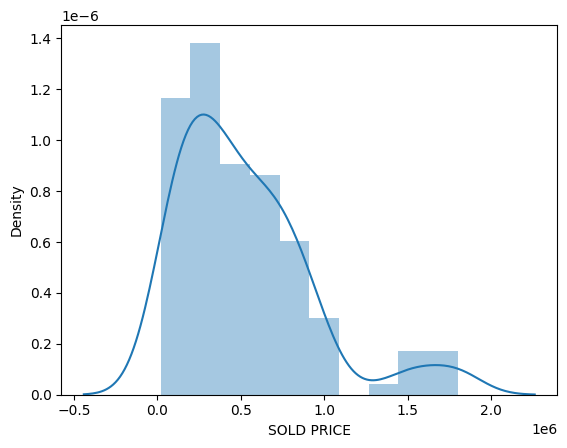

In [14]:
sns.distplot(ipl_auction_df['SOLD PRICE'])

<Axes: xlabel='SOLD PRICE', ylabel='Density'>

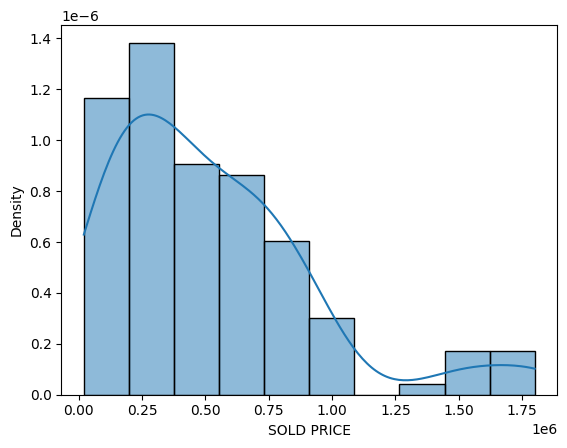

In [15]:
sns.histplot(
    ipl_auction_df['SOLD PRICE'],
    kde=True,
    stat="density"
)

### Box Plots

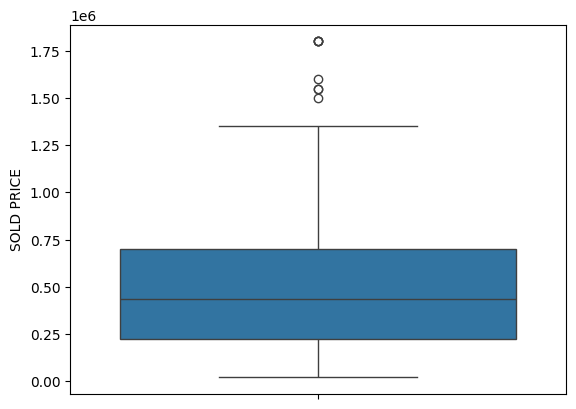

In [16]:
box = sns.boxplot(ipl_auction_df['SOLD PRICE'])

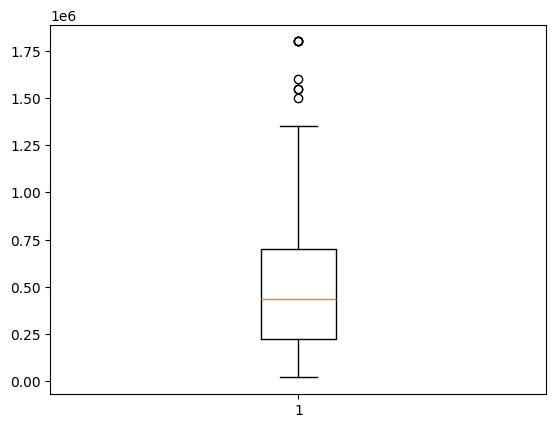

In [17]:
box = plt.boxplot(ipl_auction_df['SOLD PRICE'])

In [18]:
[item.get_ydata()[0] for item in box['caps']]

[np.int64(20000), np.int64(1350000)]

In [19]:
[item.get_ydata()[0] for item in box['whiskers']]

[np.float64(225000.0), np.float64(700000.0)]

In [20]:
[item.get_ydata()[0] for item in box['medians']]

[np.float64(437500.0)]

In [21]:
ipl_auction_df[ipl_auction_df['SOLD PRICE'] > 1350000.0][['PLAYER NAME', 'PLAYING ROLE', 'SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


### Comparing Distributions

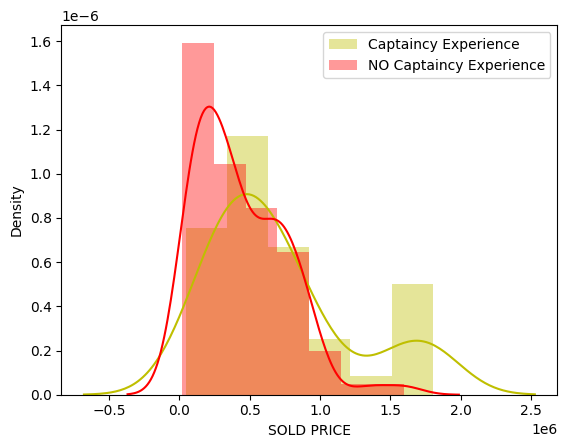

In [22]:
sns.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP'] ==1]['SOLD PRICE'], color='y', label='Captaincy Experience')
sns.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==0]['SOLD PRICE'], color='r', label='NO Captaincy Experience')
plt.legend()

<Axes: xlabel='PLAYING ROLE', ylabel='SOLD PRICE'>

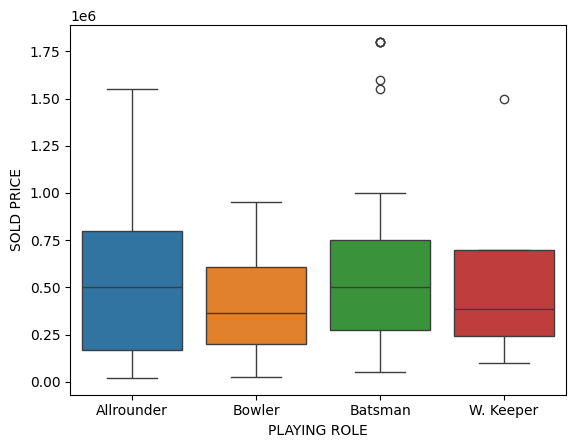

In [23]:
sns.boxplot(x='PLAYING ROLE', y='SOLD PRICE', data=ipl_auction_df, hue='PLAYING ROLE')

<Axes: xlabel='CAPTAINCY EXP', ylabel='SOLD PRICE'>

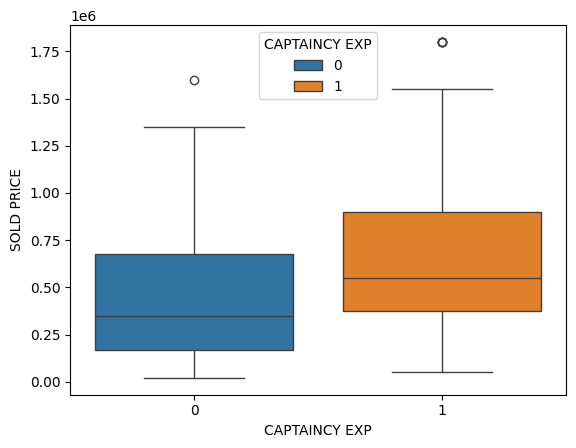

In [24]:
sns.boxplot(x='CAPTAINCY EXP', y='SOLD PRICE', data=ipl_auction_df, hue='CAPTAINCY EXP')

### Scatter Plots

In [25]:
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE'] == 'Batsman']

Text(0, 0.5, 'SOLD PRICE')

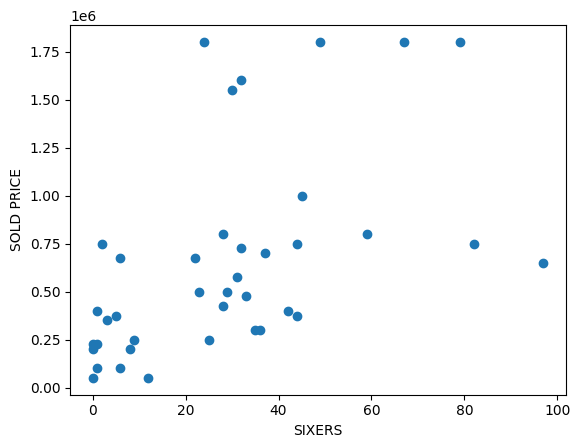

In [26]:
plt.scatter(x=ipl_batsman_df.SIXERS, y=ipl_batsman_df['SOLD PRICE'])
plt.xlabel('SIXERS')
plt.ylabel('SOLD PRICE')

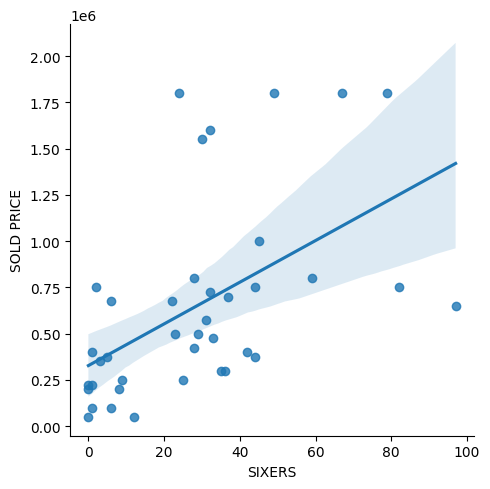

In [27]:
sns.lmplot(x='SIXERS', y='SOLD PRICE', data=ipl_batsman_df)

### Pair Plots

In [28]:
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']

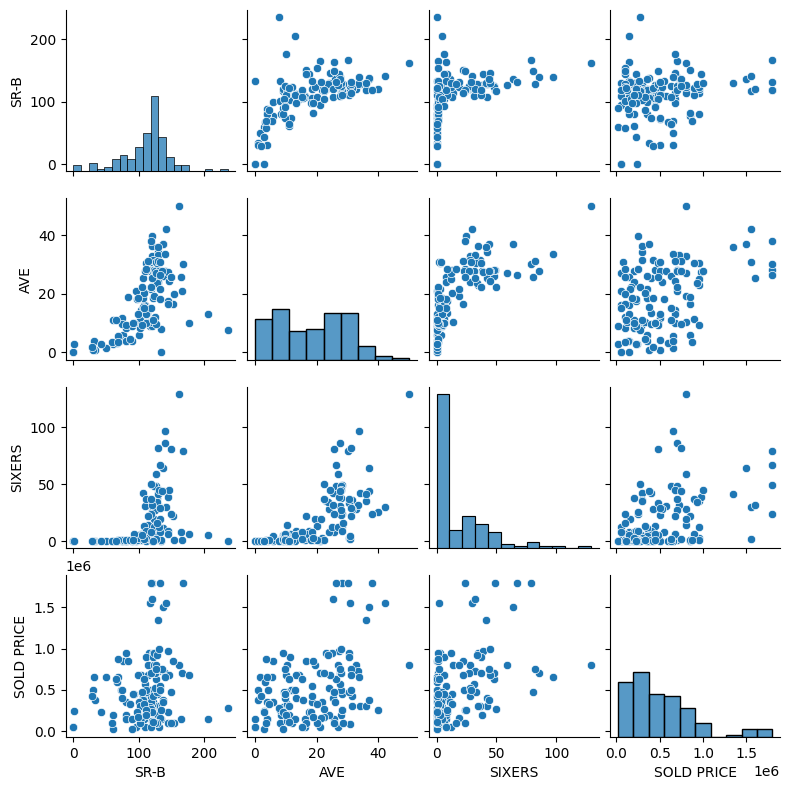

In [29]:
sns.pairplot(ipl_auction_df[influential_features], size=2)

### Correlation and Heatmaps

In [30]:
ipl_auction_df[influential_features].corr()

,SR-B,AVE,SIXERS,SOLD PRICE
SR-B,1.000000,0.583579,0.425394,0.184278
AVE,0.583579,1.000000,0.705365,0.396519
SIXERS,0.425394,0.705365,1.000000,0.450609
SOLD PRICE,0.184278,0.396519,0.450609,1.000000


<Axes: >

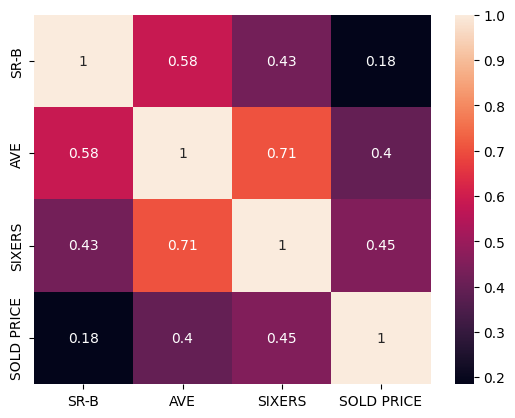

In [33]:
sns.heatmap(ipl_auction_df[influential_features].corr(), annot=True)

# Cross Tabulation and Heatmap

In [35]:
role_by_countries = pd.crosstab(ipl_auction_df['COUNTRY'], ipl_auction_df['PLAYING ROLE'], normalize='index')

role_by_countries

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
COUNTRY,,,,
AUS,0.272727,0.409091,0.272727,0.045455
BAN,0.000000,0.000000,1.000000,0.000000
ENG,0.666667,0.333333,0.000000,0.000000
IND,0.132075,0.339623,0.433962,0.094340
NZ,0.571429,0.285714,0.000000,0.142857
PAK,0.222222,0.222222,0.444444,0.111111
SA,0.437500,0.187500,0.250000,0.125000
SL,0.333333,0.166667,0.416667,0.083333
WI,0.500000,0.333333,0.166667,0.000000


<Axes: xlabel='PLAYING ROLE', ylabel='COUNTRY'>

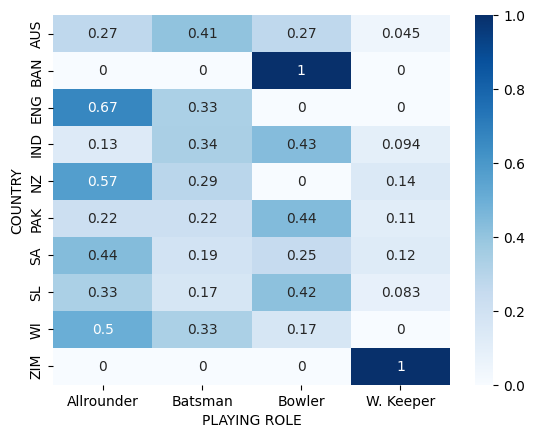

In [36]:
sns.heatmap(role_by_countries, annot=True, cmap='Blues')